# Replication Plans for Krusell and Rios-Rull (1999)
### "On the Size of U.S. Government: Political Economy in the Neoclassical Growth Model"
### AER 89 (5) p.1156-1181, 1999

### Kyung Woong Koh (May 24, 2022)

### Introduction: Part of A Serious Attempt at Political Economy and Macroeconomics

- Political economy: "How does the macroeconomy how are policies affected?"
- Macroeconomics: "How do policies affect the macroeconomy?"
- A serious discussion in each discipline eventually requires a dynamic model that answers the other discipline's questions (ex. "Is this tax cut exogenous?")

Krusell and Rios-Rull 1999 (henceforth KRR): Dynamic macroeconomic model with political economic mechanism for determining income tax rate
- Income tax rate is determined by votes of all agents in the economy, as in Meltzer and Richard (1981)

Original goal of KRR, inspired from Meltzer and Richard (1981), is to predict the size of total transfers (to GDP ratio) and therefore the "size of the U.S. government" from political economy theory
- "The total size of transfers predicted by our political-economy model is quite close to the size of transfers in the data." [About 30\% in the data and KRR's dynamic model]

Since then, this strand of literature (ex. political business cycles) has focused on the political economy question rather than the macroeconomic question
- Most of macroeconomics and its modelling until now has been homogeneous agents
- But politics can't exist among homogeneous agents (especially with homogeneous preferences)
- Macro deals in means, but political economy deals in medians

With heterogeneous agent macro, now we can discuss models with different agents, with different levels of income/wealth and therefore different preferred levels of taxation (poor people want more taxation and more redistribution than rich people do)

With HARK, we can go further!

### My Goals from Replication of KRR
1. Compare resulting size of transfers ("size of government") from replication with KRR
2. Look at effects of parameter shocks (permanent income, transitory income, etc.) to size of transfers
- Does a higher standard deviation of permanent or transitory income lead to a greater size of transfers preferred by the "median" voter? ("Social insurance")
- Does a negative aggregate productivity shock lead to a greater size of transfers preferred by the "median" voter? Does the existence of idiosyncratic shocks change this result?

### Description of the KRR Economy

1. Economy is composed of heterogeneous consumers with individual labor productivity $\varepsilon_{t}$ and assets $a_{t}$, receive at labor wage rate $w_{t}$ and capital rental rate $r_{t}$, pay $\tau_{t}$ of their total income in tax, consume $c_{t}$ and save income towards individual wealth $a_{t+1}$
\begin{align}
    &\max \sum_{t=0}^{\infty} \beta^{t} u(c_{t}, l_{t}) \text{ s.t. } \\
    c_{t} + a_{t+1} &= a_{t}(1+r_{t}(1-\tau_{t})) + w_{t}\varepsilon_{t}(1-l_{t})(1-\tau_{t}) + T_{t} \\
    u(c,l) &= ((c^{\alpha}l^{1-\alpha})^{1-\sigma}-1)/(1-\sigma)
\end{align}


2. Aggregate labor and aggregate capital are normalized as follows:
\begin{align}
    \sum_{i}\varepsilon_{it} &= N \\
    \sum_{i}a_{it} &= K
\end{align}


3. Resource constraint of economy is
\begin{equation}
    C_{t} + K_{t+1} - K_{t}(1-\delta) + g_{t} = F(K_{t},N_{t})
\end{equation}
where $F(K,N)$ is the aggregate production function


4. Income taxation is redistributed as equal lump-sum transfers (after accounting for government consumption $g_{t}$)
\begin{equation}
    g_{t} + T_{t} = \tau_{t}(K_{t}r_{t} + N_{t}w_{t})
\end{equation}


5. Each consumer periodically votes for the tax rate $\tau_{t}$ that maximizes his/her equilibrium utility, given the asset ("wealth") distribution $A_{t}=\{a_{it}\}$:
\begin{align}
    \tau_{t+1} &= \Psi(A_{t},\tau_{t}) \\
    A_{t+1} &= H(A_{t},\tau_{t})
\end{align}
where $\Psi(A,\tau)$ is the transition function of current asset distribution $A_{t}$ and tax rate $\tau_{t}$ to the new politically determined tax rate $\tau_{t+1}$ (political equilibrium), and $H(A,\tau)$ is the transition function to the next period's asset distribution $A_{t+1}$ (economic equilibrium).

Our goal is to find the politico-economic equilibrium $\tau  =\Psi(A,\tau)$ and $A = H(A,\tau)$

### What is already possible in HARK

I would use the $\texttt{AggShockConsumerType}$ and $\texttt{CobbDouglasEconomy}$ classes under $\texttt{HARK.ConsumptionSaving.ConsAggShockModel}$, which provides the tools to compute  both consumption and labor choices in an economy with Cobb-Douglas production of aggregate labor and aggregate capital

### To Do ###

- Use "market" class for updating tax rates (partial eq. version, solve for R and w using Cobb-Douglas, etc.)
(https://github.com/econ-ark/DistributionOfWealthMPC)
- 1. compute with tax rates
- 2. compute with different tax rates
- 3. utility of different groups with different tax rates

<!-- **Krusell and Rios-Rull's parameters for income and wealth distribution:**

Sorted by Wealth

<p>Group 1 (49%): Household wealth = 0.30, Earnings = 0.57<br>
Group 2 (2%): Household wealth = 1, Earnings = 1<br>
Group 3 (49%): Household wealth = 4.78, Earnings = 1.91</p>

<p>Sorted by Earnings<br>
Group 1 (49%): Household wealth = 0.55, Earnings = 0.24<br>
Group 2 (2%): Household wealth = 1, Earnings = 1<br>
Group 3 (49%): Household wealth = 2.93, Earnings = 2.94</p>

*Greater inequality in household wealth than in household earnings* -->

**Parameters in KRR99**
<p>beta = 0.96 (Annual discount rate)<br>
alpha = 0.429 (Utility weight of consumption)<br>
sigma = 4 (Risk aversion parameter)<br>
delta = 0.05 (Depreciation rate)<br>
theta = 0.36 (Share of capital income)<br>
Wealth-output ratio = 3.3<br>
r = 0.06 (Pre-tax)<br>
C/Y = 0.638 (Consumption-output ratio)<br>
g/Y = 0.199 (Government spending-output ratio, but for now I assume in the code g/Y = 0)<br>
N = 0.34 (Labor hours)</p>

**Progress:**
1. *Devised code for `AggShockConsumerType_tax` class*: Inherits from `AggShockConsumerType` class and introduces flat income tax rate (`tax_rate`)
2. *Included code for calculating value function (`vFunc`) in `AggShockConsumerType_tax` class*: This is to calculate the value function of the median agent (as in the agent with the median level of wealth)
3. *Devised code for finding median agent's preferred tax rate*: For loop process for calculating post-tax(-and-transfer) value function of agent with median level of wealth

**Stumbling Blocks:**
1. *Getting to single-peaked preferences for tax rates*: I have so far located and altered the code that calculates the lump-sum transfers that each agent receives, and higher tax rates do lead to lower levels of individual asset levels (`aLvl`, normalized to `aNrm`). However, I am having trouble replicating the single-peaked preferences of agents on the tax rate and hence level of redistribution (transfers). The code in its current state leads to the top 60\% of the agents (in terms of wealth) preferring a zero tax rate and the bottom 40\% preferring the maximum level of tax rate (0.95 in the current code).
- If I can replicate the results of single-peaked preferences on tax rates for each agent, the most preferred tax rate of the median agent in terms of wealth should be the economy's chosen flat income tax rate.

In [1]:
import HARK
import sys
from HARK.ConsumptionSaving.ConsAggShockModel import (AggShockConsumerType, CobbDouglasEconomy, init_agg_shocks,
    init_cobb_douglas,
    solveConsAggShock,
    AggregateSavingRule
)

from ConsAggShockModel_tax import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy
from HARK.utilities import plot_funcs, make_figs
import statsmodels.api as sm
from time import process_time
def mystr(number):
    return "{:.4f}".format(number)

I first set the parameters for each agent in the `AggShockConsumerType_tax` class as follows, with the addition of a flat income tax rate (`tax_rate`):

In [2]:
# Define a dictionary with calibrated parameters
AgentParameters = {
    "CRRA":4.00,                    # Coefficient of relative risk aversion
    "DiscFac": 0.96,             # Default intertemporal discount factor; dummy value, will be overwritten
    "Rfree": 1.06, # Survival probability,
    "PermShkCount" : 1,                    # Number of points in discrete approximation to permanent income shocks - no shocks of this kind!
    "TranShkCount" : 5,                    # Number of points in discrete approximation to transitory income shocks
    "PermShkStd" : [0.0],                   # Standard deviation of log permanent income shocks - no shocks of this kind!
    "TranShkStd" : [0.5],                   # Standard deviation of log transitory income shocks
    "UnempPrb" : 0.0,                      # Probability of unemployment while working - no shocks of this kind!
    "UnempPrbRet" : 0.00,                  # Probability of "unemployment" while retired - no shocks of this kind!
    "IncUnemp" : 0.0,                      # Unemployment benefits replacement rate
    "IncUnempRet" : 0.0,                   # "Unemployment" benefits when retired
    "T_retire" : 0,                        # Period of retirement (0 --> no retirement)
    "BoroCnstArt" : 0.0,                   # Artificial borrowing constraint; imposed minimum level of end-of period assets
    "PermGroFac" : [1.0],                  # Permanent income growth factor

    "CubicBool":False,
    "vFuncBool":True,
    "aXtraMin":0.00001,  # Minimum end-of-period assets in grid
    "aXtraMax":40,  # Maximum end-of-period assets in grid
    "aXtraCount":32,  # Number of points in assets grid
    "aXtraExtra":[None],
    "aXtraNestFac":3,  # Number of times to 'exponentially nest' when constructing assets grid
    "LivPrb":[1.0],  # Survival probability
    # "LivPrb":[1.0 - 1.0/160.0],  # Survival probability

    "cycles":0,
    "T_cycle":1,
    'T_sim':50,  # Number of periods to simulate (idiosyncratic shocks model, perpetual youth)
    'T_age': 100,
    'IndL': 1.0,  # Labor supply per individual (constant)
    'aNrmInitMean':np.log(0.00001),
    'aNrmInitStd':0.0,
    'pLvlInitMean':0.0,
    'pLvlInitStd':0.0,
    'AgentCount':100,
    'MgridBase': np.array([0.1,0.3,0.6,
                           0.8,0.9,0.98,
                           1.0,1.02,1.1,
                           1.2,1.6,2.0,
                           3.0]),          # Grid of capital-to-labor-ratios (factors)
    'PermGroFacAgg': 1.0,

    # Variables necessary for AggShockConsumerType_tax model
    'tax_rate':0.00,

    # Parameters describing the income process
    # New Parameters that we need now
    'PermShkAggStd' : [0.0],           # Standard deviation of log aggregate permanent shocks by state. No continous shocks in a state.
    'TranShkAggStd' : [0.0],           # Standard deviation of log aggregate transitory shocks by state. No continuous shocks in a state.
}

In [3]:
# Code source: https://github.com/econ-ark/HARK/blob/master/examples/ConsumptionSaving/example_ConsAggShockModel.ipynb
# See also, on HARK.core.Market: https://hark.readthedocs.io/en/latest/reference/tools/core.html#HARK.core.Market
# For details on Krusell-Smith model in HARK: https://github.com/econ-ark/KrusellSmith/blob/master/Code/Python/KrusellSmith.ipynb
# See also: https://github.com/econ-ark/HARK/blob/master/examples/HowWeSolveIndShockConsumerType/HowWeSolveIndShockConsumerType.ipynb

AggShockAgent_tax = AggShockConsumerType_tax(**AgentParameters)

I create a new Market class, `CobbDouglasEconomy_tax`, to account for the fact that flat income tax rates have distortionary effects on output and therefore income. The trade-off is that higher tax rates lead to higher transfers to the median voter, but also incur greater productive inefficiencies and therefore decreases aggregate output and thus aggregate income.


In [4]:
EconomyExample = CobbDouglasEconomy_tax(agents=[AggShockAgent_tax], PermShkAggCount = 1, TranShkAggCount = 1,
                                    PermShkAggStd = 0.0, TranShkAggStd = 0.0, DeprFac = 0.025, PermGroFacAgg = 1.0,
                                    AggregateL = 1.0, CapShare = 0.36, CRRA = 4.0, tolerance = 0.01, tax_rate = 0.00)

I then solve for the model.

In [5]:
# Have the consumers inherit relevant objects from the economy
AggShockAgent_tax.get_economy_data(EconomyExample)

# Simulate a history of aggregate shocks
EconomyExample.make_AggShkHist()

# Solve for aggregate shock consumer model
AggShockAgent_tax.solve()
AggShockAgent_tax.track_vars = ['pLvl','TranShk']

In [6]:
# Solve the "macroeconomic" model by searching for a "fixed point dynamic rule"
print("Now solving for the equilibrium of a Cobb-Douglas economy.  This might take a few minutes...")
EconomyExample.solve()

Now solving for the equilibrium of a Cobb-Douglas economy.  This might take a few minutes...
intercept=-0.4105444080600119, slope=1.125591755269752, r-sq=0.8751220283100419
intercept=-0.5773773336944872, slope=1.1758308616806983, r-sq=0.7832480696460743
intercept=-0.6143577175394321, slope=1.1769354543417325, r-sq=0.7775438351465407
intercept=-0.6007363390178455, slope=1.1626718040790442, r-sq=0.7970695854316208
intercept=-0.5690387254827868, slope=1.144596971056191, r-sq=0.8063777583962056
intercept=-0.5468314979996045, slope=1.1330227287075487, r-sq=0.8063809444926041
intercept=-0.5361412473190595, slope=1.1275020394502473, r-sq=0.8088097539216079
intercept=-0.5311542259396487, slope=1.1249304315188215, r-sq=0.8099901725510611


Consumption function at each aggregate market resources-to-labor ratio gridpoint

Consumption function at each aggregate market resources-to-labor ratio gridpoint:


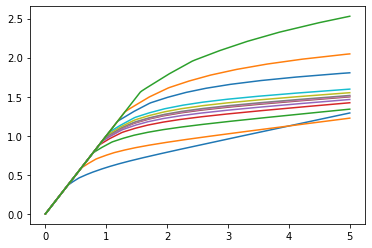

In [7]:
AggShockAgent_tax.unpack('cFunc')

print("Consumption function at each aggregate market resources-to-labor ratio gridpoint:")
m_grid = np.linspace(0, 5, 200)
for M in AggShockAgent_tax.Mgrid.tolist():
    mMin = AggShockAgent_tax.solution[0].mNrmMin(M)
    c_at_this_M = AggShockAgent_tax.cFunc[0](m_grid + mMin, M * np.ones_like(m_grid))
    plt.plot(m_grid + mMin, c_at_this_M)
plt.show()

Value function at each aggregate market resources-to-labor ratio gridpoint

Value function at each aggregate market resources-to-labor ratio gridpoint:


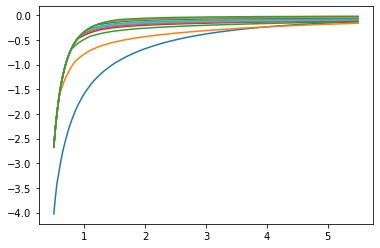

In [8]:
AggShockAgent_tax.unpack('vFunc')

print("Value function at each aggregate market resources-to-labor ratio gridpoint:")
m_grid = np.linspace(0, 5, 200)
for M in AggShockAgent_tax.Mgrid.tolist():
    mMin = AggShockAgent_tax.solution[0].mNrmMin(M)+0.5
    v_at_this_M = AggShockAgent_tax.vFunc[0](m_grid + mMin, M * np.ones_like(m_grid))
    plt.plot(m_grid + mMin, v_at_this_M)
plt.show()

Summary Statistics for Agents' Wealth and Income 

In [9]:
# Normalized market resources of each agent
sim_market_resources = AggShockAgent_tax.state_now['mNrm']

# Normalized assets of each agent
sim_wealth = AggShockAgent_tax.state_now['aNrm']

# Summary Statistics

# Lump-sum transfers are calculated through AggShockConsumerType_tax.calc_transfers() method:
print("The lump-sum transfer in terms of permanent income is: " + str(AggShockAgent_tax.calc_transfers()))

print("The mean of individual market resources is " + str(sim_market_resources.mean()) + "; the standard deviation is "
      + str(sim_market_resources.std()) + "; the median is " + str(np.median(sim_market_resources)) + ".")
print("The mean of individual wealth is " + str(sim_wealth.mean()) + "; the standard deviation is "
      + str(sim_wealth.std()) + "; the median is " + str(np.median(sim_wealth)) + ".")

print("The median level of market resources is: " + str(np.median(AggShockAgent_tax.state_now['mNrm'])))

The lump-sum transfer in terms of permanent income is: 0.0
The mean of individual market resources is 17.209977576559048; the standard deviation is 4.400319630466238; the median is 16.418608939597988.
The mean of individual wealth is 14.981784923214564; the standard deviation is 4.153142622717656; the median is 14.234446679033013.
The median level of market resources is: 16.418608939597988


So far, the model generatse far too little wealth inequality, as seen by the graph of the Lorenz curve of the wealth distribution below:

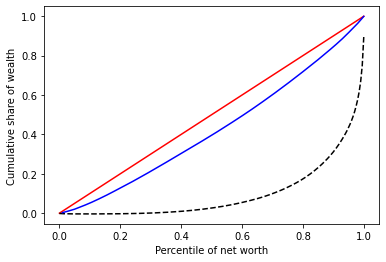

In [10]:
# Lorenz Curve of Wealth Distribution

from HARK.datasets import load_SCF_wealth_weights
from HARK.utilities import get_lorenz_shares, get_percentiles

SCF_wealth, SCF_weights = load_SCF_wealth_weights()

pctiles = np.linspace(0.001,0.999,200)

SCF_Lorenz_points = get_lorenz_shares(SCF_wealth,weights=SCF_weights,percentiles=pctiles)
sim_Lorenz_points = get_lorenz_shares(sim_wealth,percentiles=pctiles)
plt.plot(pctiles,pctiles,'-r')
plt.plot(pctiles,SCF_Lorenz_points,'--k')
plt.plot(pctiles,sim_Lorenz_points,'-b')
plt.xlabel('Percentile of net worth')
plt.ylabel('Cumulative share of wealth')
plt.show(block=False)

### The method for determining the optimal tax rate for the median voter is as follows:

1. Create a grid of tax rates.
2. For each tax rate, use the procedure above to compute each agent's normalized market resources (and asset).
3. Given the array of normalized market resources, we locate the median level of market resources as the median agent, then compute their value function at their level of market resources.
4. Record the value function of the median agent at the given tax rate.
5. Repeat steps 2 to 4 until we have solved for the median agent's value function at each tax rate. The tax rate corresponding to the highest value of the median agent's value function is the optimal tax rate **for the median voter**, hence the political equilibrium (flat income tax rate).

For tax rates, I create a 20 $\times$ 1 grid of tax rates from 0.00 to 0.95.

For reference (and to reduce computing time), in the for loop code below I calculate the optimal tax rate for agents with their wealth in the 10th, 20th, and up to 90th percentiles.

In [11]:
rates = 20
tax_rates = np.linspace(0.00, 0.95, num=rates)

v_at_p90_wealth = [] # Vector for value function of 90th percentile wealth agent at each level of flat income tax rate
v_at_p80_wealth = [] # Vector for value function of 80th percentile wealth agent at each level of flat income tax rate
v_at_p70_wealth = [] # Vector for value function of 70th percentile wealth agent at each level of flat income tax rate
v_at_p60_wealth = [] # Vector for value function of 60th percentile wealth agent at each level of flat income tax rate
v_at_median_wealth = [] # Vector for value function of median wealth agent at each level of flat income tax rate
v_at_p40_wealth = [] # Vector for value function of 40th percentile wealth agent at each level of flat income tax rate
v_at_p30_wealth = [] # Vector for value function of 30th percentile wealth agent at each level of flat income tax rate
v_at_p20_wealth = [] # Vector for value function of 20th percentile wealth agent at each level of flat income tax rate
v_at_p10_wealth = [] # Vector for value function of 10th percentile wealth agent at each level of flat income tax rate

for tau in tax_rates:

    AggShockAgent_tax_tau = deepcopy(AggShockAgent_tax)
    AggShockAgent_tax_tau.tax_rate = tau
    EconomyExample_tau = deepcopy(EconomyExample)
    EconomyExample_tau.tax_rate = tau
    AggShockAgent_tax_tau.get_economy_data(EconomyExample_tau)
    EconomyExample_tau.make_AggShkHist()
    AggShockAgent_tax_tau.solve()
    AggShockAgent_tax_tau.initialize_sim()
    AggShockAgent_tax_tau.simulate()
    AggShockAgent_tax_tau.track_vars = ['aNrm','pLvl','mNrm','TranShk']
    EconomyExample_tau.solve()
    AggShockAgent_tax_tau.unpack('vFunc')

    sim_market_resources_tau = AggShockAgent_tax_tau.state_now['mNrm']
    sim_wealth_tau = AggShockAgent_tax_tau.state_now['aNrm']
    
    print("The flat income tax rate is: " + mystr(AggShockAgent_tax_tau.tax_rate))

    print("The lump-sum transfer in terms of permanent income is: " + mystr(AggShockAgent_tax_tau.calc_transfers()))

    print("The mean of individual wealth is " + mystr(sim_wealth_tau.mean()) + "; the standard deviation is "
          + str(sim_wealth_tau.std()) + "; the median is " + mystr(np.median(sim_wealth_tau)) + ".")
    print("The mean of individual market resources is " + mystr(sim_market_resources_tau.mean()) + "; the standard deviation is "
          + str(sim_market_resources_tau.std()) + "; the median is " + mystr(np.median(sim_market_resources_tau)) + ".")
    print("The 90th percentile of individual wealth is " + mystr(np.percentile(sim_wealth_tau,90)) + ".")
    print("The 80th percentile of individual wealth is " + mystr(np.percentile(sim_wealth_tau,80)) + ".")
    print("The 70th percentile of individual wealth is " + mystr(np.percentile(sim_wealth_tau,70)) + ".")
    print("The 60th percentile of individual wealth is " + mystr(np.percentile(sim_wealth_tau,60)) + ".")
    print("The median of individual wealth is " + mystr(np.median(sim_wealth_tau)) + ".")
    print("The 40th percentile of individual wealth is " + mystr(np.percentile(sim_wealth_tau,40)) + ".")
    print("The 30th percentile of individual wealth is " + mystr(np.percentile(sim_wealth_tau,30)) + ".")
    print("The 20th percentile of individual wealth is " + mystr(np.percentile(sim_wealth_tau,20)) + ".")
    print("The 10th percentile of individual wealth is " + mystr(np.percentile(sim_wealth_tau,10)) + ".\n")
    
    # Tax rate as determined by agent (pre-tax)'s wealth and income
    sim_p90_wealth_tau = np.percentile(sim_wealth_tau,90)
    sim_p90_market_resources_tau = np.percentile(sim_market_resources_tau,90)
    sim_p80_wealth_tau = np.percentile(sim_wealth_tau,80)
    sim_p80_market_resources_tau = np.percentile(sim_market_resources_tau,80)
    sim_p70_wealth_tau = np.percentile(sim_wealth_tau,70)
    sim_p70_market_resources_tau = np.percentile(sim_market_resources_tau,70)
    sim_p60_wealth_tau = np.percentile(sim_wealth_tau,60)
    sim_p60_market_resources_tau = np.percentile(sim_market_resources_tau,60)
    sim_median_wealth_tau = np.median(sim_wealth_tau)
    sim_median_market_resources_tau = np.median(sim_market_resources_tau)
    sim_p40_wealth_tau = np.percentile(sim_wealth_tau,40)
    sim_p40_market_resources_tau = np.percentile(sim_market_resources_tau,40)
    sim_p30_wealth_tau = np.percentile(sim_wealth_tau,30)
    sim_p30_market_resources_tau = np.percentile(sim_market_resources_tau,30)
    sim_p20_wealth_tau = np.percentile(sim_wealth_tau,20)
    sim_p20_market_resources_tau = np.percentile(sim_market_resources_tau,20)
    sim_p10_wealth_tau = np.percentile(sim_wealth_tau,10)
    sim_p10_market_resources_tau = np.percentile(sim_market_resources_tau,10)
    # Find value function of post-tax Xth-percentile wealth agent/voter, with X taking values from 10 to 90
    # vFunc arguments: Each agent's level of market resources
    # and median agent's capital-labor ratio (assumed as 1.0 for now)
    v_at_p90_wealth_tau = AggShockAgent_tax_tau.vFunc[0](sim_p90_market_resources_tau, 1.0)
    v_at_p80_wealth_tau = AggShockAgent_tax_tau.vFunc[0](sim_p80_market_resources_tau, 1.0)
    v_at_p70_wealth_tau = AggShockAgent_tax_tau.vFunc[0](sim_p70_market_resources_tau, 1.0)
    v_at_p60_wealth_tau = AggShockAgent_tax_tau.vFunc[0](sim_p60_market_resources_tau, 1.0)
    v_at_median_wealth_tau = AggShockAgent_tax_tau.vFunc[0](sim_median_market_resources_tau, 1.0)
    v_at_p40_wealth_tau = AggShockAgent_tax_tau.vFunc[0](sim_p40_market_resources_tau, 1.0)
    v_at_p30_wealth_tau = AggShockAgent_tax_tau.vFunc[0](sim_p30_market_resources_tau, 1.0)
    v_at_p20_wealth_tau = AggShockAgent_tax_tau.vFunc[0](sim_p20_market_resources_tau, 1.0)
    v_at_p10_wealth_tau = AggShockAgent_tax_tau.vFunc[0](sim_p10_market_resources_tau, 1.0)

    v_at_p90_wealth.append(v_at_p90_wealth_tau)
    v_at_p80_wealth.append(v_at_p80_wealth_tau)
    v_at_p70_wealth.append(v_at_p70_wealth_tau)
    v_at_p60_wealth.append(v_at_p60_wealth_tau)
    v_at_median_wealth.append(v_at_median_wealth_tau)
    v_at_p40_wealth.append(v_at_p40_wealth_tau)
    v_at_p30_wealth.append(v_at_p30_wealth_tau)
    v_at_p20_wealth.append(v_at_p20_wealth_tau)
    v_at_p10_wealth.append(v_at_p10_wealth_tau)

intercept=-0.5288444895735478, slope=1.1237386173871755, r-sq=0.810535437461125
intercept=-0.5277773305948623, slope=1.1231871654603125, r-sq=0.8107863137511139
The flat income tax rate is: 0.0000
The lump-sum transfer in terms of permanent income is: 0.0000
The mean of individual wealth is 1.6152; the standard deviation is 1.1373366189717646; the median is 1.5974.
The mean of individual market resources is 3.3754; the standard deviation is 1.4259230889521275; the median is 3.4264.
The 90th percentile of individual wealth is 3.2004.
The 80th percentile of individual wealth is 2.6403.
The 70th percentile of individual wealth is 2.0155.
The 60th percentile of individual wealth is 1.7983.
The median of individual wealth is 1.5974.
The 40th percentile of individual wealth is 1.0583.
The 30th percentile of individual wealth is 0.8105.
The 20th percentile of individual wealth is 0.5695.
The 10th percentile of individual wealth is 0.3880.

intercept=-0.5288444895735478, slope=1.12373861738717

intercept=-0.5288444895735478, slope=1.1237386173871755, r-sq=0.810535437461125
intercept=-0.5277773305948623, slope=1.1231871654603125, r-sq=0.8107863137511139
The flat income tax rate is: 0.4500
The lump-sum transfer in terms of permanent income is: 0.7646
The mean of individual wealth is 1.3410; the standard deviation is 0.5833032342349028; the median is 1.3700.
The mean of individual market resources is 3.0860; the standard deviation is 0.7388351961625467; the median is 3.1445.
The 90th percentile of individual wealth is 2.1357.
The 80th percentile of individual wealth is 1.7904.
The 70th percentile of individual wealth is 1.6173.
The 60th percentile of individual wealth is 1.5121.
The median of individual wealth is 1.3700.
The 40th percentile of individual wealth is 1.0939.
The 30th percentile of individual wealth is 0.9513.
The 20th percentile of individual wealth is 0.8059.
The 10th percentile of individual wealth is 0.6010.

intercept=-0.5288444895735478, slope=1.12373861738717

intercept=-0.5288444895735478, slope=1.1237386173871755, r-sq=0.810535437461125
intercept=-0.5277773305948623, slope=1.1231871654603125, r-sq=0.8107863137511139
The flat income tax rate is: 0.9000
The lump-sum transfer in terms of permanent income is: 1.5255
The mean of individual wealth is 1.2373; the standard deviation is 0.10086260227471801; the median is 1.2498.
The mean of individual market resources is 2.9766; the standard deviation is 0.12778456908404473; the median is 2.9926.
The 90th percentile of individual wealth is 1.3677.
The 80th percentile of individual wealth is 1.3137.
The 70th percentile of individual wealth is 1.2893.
The 60th percentile of individual wealth is 1.2758.
The median of individual wealth is 1.2498.
The 40th percentile of individual wealth is 1.2037.
The 30th percentile of individual wealth is 1.1716.
The 20th percentile of individual wealth is 1.1454.
The 10th percentile of individual wealth is 1.1054.

intercept=-0.5288444895735478, slope=1.123738617387

In [12]:
# Create graph of value function of agent with median level of wealth for each tax rate from 0.00 to 0.95 (in increments of 0.05)
print(v_at_median_wealth)
print(mystr(np.max(v_at_median_wealth)))
optimal_tax_rate = tax_rates[v_at_median_wealth.index(np.max(v_at_median_wealth))]
print("The optimal tax rate for the median voter is " + str(mystr(optimal_tax_rate)) + ".")

[-0.18024185069296117, -0.18317580502027975, -0.1860943631876579, -0.18863797524560463, -0.19091539573104457, -0.19331515020503487, -0.19578321513387012, -0.19863371576492914, -0.20146974527626826, -0.20427111010720223, -0.20689967041648563, -0.208894082770684, -0.21057150198480734, -0.21225877485094602, -0.21389641664241943, -0.21538697127150086, -0.21687049297348124, -0.2183058299162628, -0.2196147425502362, -0.22062562463681654]
-0.1802
The optimal tax rate for the median voter is 0.0000.


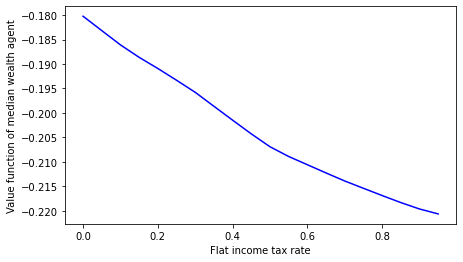

In [13]:
plt.figure(figsize=(7,4))
plt.plot(tax_rates, v_at_median_wealth, 'b-', label = 'Value function of median wealth agent')
plt.xlabel('Flat income tax rate')
plt.ylabel('Value function of median wealth agent')
plt.show()

The graph above shows the value function for the median wealth agent at tax rates from 0\% to 95\% (in 5\% increments). We see that the value function generally decreases linearly.

Ideally, the graph would show single-peaked preferences for the median wealth agent, with a roughly parabolic value function.

### So far, the problem is that the median pre-tax wealth is already greater than the mean pre-tax wealth, and so the median voter most prefers an income tax rate of 0.

What would be the optimal tax rate for agents with wealth / market resources of other percentiles?

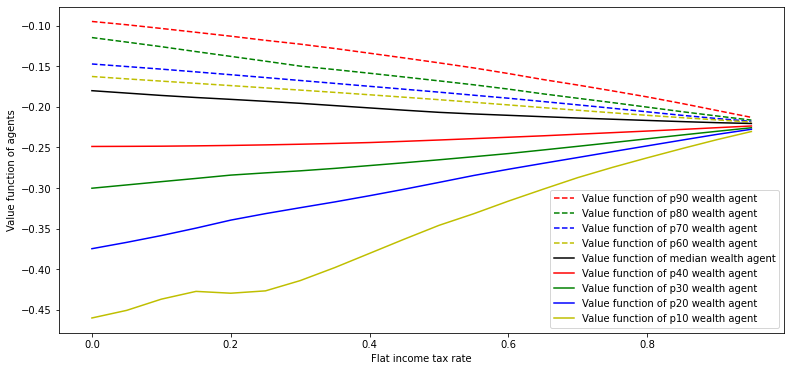

In [14]:
plt.figure(figsize=(13,6))
plt.plot(tax_rates, v_at_p90_wealth, 'r--', label = 'Value function of p90 wealth agent')
plt.plot(tax_rates, v_at_p80_wealth, 'g--', label = 'Value function of p80 wealth agent')
plt.plot(tax_rates, v_at_p70_wealth, 'b--', label = 'Value function of p70 wealth agent')
plt.plot(tax_rates, v_at_p60_wealth, 'y--', label = 'Value function of p60 wealth agent')
plt.plot(tax_rates, v_at_median_wealth, 'k-', label = 'Value function of median wealth agent')
plt.plot(tax_rates, v_at_p40_wealth, 'r-', label = 'Value function of p40 wealth agent')
plt.plot(tax_rates, v_at_p30_wealth, 'g-', label = 'Value function of p30 wealth agent')
plt.plot(tax_rates, v_at_p20_wealth, 'b-', label = 'Value function of p20 wealth agent')
plt.plot(tax_rates, v_at_p10_wealth, 'y-', label = 'Value function of p10 wealth agent')

plt.xlabel('Flat income tax rate')
plt.ylabel('Value function of agents')
plt.legend()
plt.show()

The graph above shows the value function for an agent at the 10th, 20th, and up to 90th percentile of the wealth distribution at tax rates from 0\% to 95\% (in 5\% increments). We see that the value function generally increases linearly for agents with relatively lower levels of wealth (up to the 40th percentile, or `p40 wealth agent`), but generally decreases linearly for agents with relatively higher levels of wealth (down to the 50th percnetile, or `median wealth agent`).

Ideally, the graph would show single-peaked preferences for each agent, with the value functions being roughly parabolic and with their peaks at higher levels of tax rates for agents with relatively lower levels of wealth.

In [15]:
optimal_tax_rate_p90 = tax_rates[v_at_p90_wealth.index(np.max(v_at_p90_wealth))]
optimal_tax_rate_p80 = tax_rates[v_at_p80_wealth.index(np.max(v_at_p80_wealth))]
optimal_tax_rate_p70 = tax_rates[v_at_p70_wealth.index(np.max(v_at_p70_wealth))]
optimal_tax_rate_p60 = tax_rates[v_at_p60_wealth.index(np.max(v_at_p60_wealth))]
optimal_tax_rate_median = tax_rates[v_at_median_wealth.index(np.max(v_at_median_wealth))]
optimal_tax_rate_p40 = tax_rates[v_at_p40_wealth.index(np.max(v_at_p40_wealth))]
optimal_tax_rate_p30 = tax_rates[v_at_p30_wealth.index(np.max(v_at_p30_wealth))]
optimal_tax_rate_p20 = tax_rates[v_at_p20_wealth.index(np.max(v_at_p20_wealth))]
optimal_tax_rate_p10 = tax_rates[v_at_p10_wealth.index(np.max(v_at_p10_wealth))]

print("The optimal tax rate for the 90th percentile voter is " + str(mystr(optimal_tax_rate_p90)) + ".")
print("The optimal tax rate for the 80th percentile voter is " + str(mystr(optimal_tax_rate_p80)) + ".")
print("The optimal tax rate for the 70th percentile voter is " + str(mystr(optimal_tax_rate_p70)) + ".")
print("The optimal tax rate for the 60th percentile voter is " + str(mystr(optimal_tax_rate_p60)) + ".")
print("The optimal tax rate for the median voter is " + str(mystr(optimal_tax_rate_median)) + ".")
print("The optimal tax rate for the 40th percentile voter is " + str(mystr(optimal_tax_rate_p40)) + ".")
print("The optimal tax rate for the 30th percentile voter is " + str(mystr(optimal_tax_rate_p30)) + ".")
print("The optimal tax rate for the 20th percentile voter is " + str(mystr(optimal_tax_rate_p20)) + ".")
print("The optimal tax rate for the 10th percentile voter is " + str(mystr(optimal_tax_rate_p10)) + ".")

The optimal tax rate for the 90th percentile voter is 0.0000.
The optimal tax rate for the 80th percentile voter is 0.0000.
The optimal tax rate for the 70th percentile voter is 0.0000.
The optimal tax rate for the 60th percentile voter is 0.0000.
The optimal tax rate for the median voter is 0.0000.
The optimal tax rate for the 40th percentile voter is 0.9500.
The optimal tax rate for the 30th percentile voter is 0.9500.
The optimal tax rate for the 20th percentile voter is 0.9500.
The optimal tax rate for the 10th percentile voter is 0.9500.


So far, for agents in different percentiles of wealth still prefer a flat income tax rate of either zero or the maximum value (here, 0.95), which shows that the code so far does not result in single-peaked preferences of voters for tax rates. However, we do find that the optimal tax rate for agents with lower levels of wealth relative to others prefer a higher tax rate. This somewhat confirms that voters with lower levels of wealth will prefer higher levels of taxation and redistribution, and vice versa.

In this simulation, we find that the bottom 40 percent of voters would vote for (nearly) full redistribution, whereas the top 60 percent would vote for zero redistribution. This would lead to a politically determined tax rate of 0\%.

### Things to Improve Upon

My replication, so far, is able to show how voters/agents with lower levels of wealth prefer a higher flat income tax rate and thus a higher level of redistribution than voters/agents with higher levels of wealth, thus satisfying a crucial result from Romer (1975) and Krusell and Rios-Rull (1999).

However, my still fails to show single-peaked preferences for the flat income tax rate and thus the level of income redistribution of each voter/agent at their respective level of wealth / market resources.

In further simulations (by changing parameter values), I find that changing the value of the CRRA coefficient or the standard deviation of the transitory idiosyncratic income shock does not substantially change the results of this replication in its current state: still not enough voters (around 40\%) prefer a positive tax rate, resulting in zero redistribution.

A significant part of the problem is that somehow the specifications so far lead to the median voter facing a post-tax decrease in market resources, thereby preferring to vote against any positive tax rate. The solution may lie in altering the parameters to the point where the lump-sum transfers that the median-wealth voter gets is greater than the loss in output / median-wealth voter's wealth through distortionary taxation.

Alternatively, it may just be that the current `AggShockConsumerType` class simply assumes an exogenous labor supply of 1 (both for each agent and, in aggregate, mean). With an endogenous labor supply, a higher income tax rate would lower each agent's labor supply and increase each agent's leisure, thus leading to a higher value of the value function at higher tax rates than currently from the code. That may increase the optimal tax rate for some agents (particularly for the median agent), although I am not sure whether that would lead to single-peaked preferences as opposed to the linear shape of the curves above that we see right now.